## Amazon Dataset - Comprehensive Exploratory Data Analysis (EDA)

This notebook performs a complete EDA on the Amazon dataset using Pandas, Matplotlib, Seaborn, and Plotly libraries.

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats as scipy_stats
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
df = pd.read_csv('amazon.csv')
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (1465, 16)


In [2]:
# Dataset Overview and Basic Information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)

print(f"\nDataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\nFirst 5 rows:")
df.head()

DATASET OVERVIEW

Dataset Shape: (1465, 16)
Number of rows: 1465
Number of columns: 16

Column Names:
['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']

Data Types:
product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

Missing Values:
rating_count    2
dtype: int64

First 5 rows:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [28]:
# Data Preprocessing - Extract numerical values from price columns
def extract_numeric_price(price_str):
    if pd.isna(price_str):
        return np.nan
    try:
        # Remove currency symbol and commas, extract numeric value
        return float(str(price_str).replace('₹', '').replace(',', ''))
    except (ValueError, TypeError):
        return np.nan

def extract_numeric_percentage(percentage_str):
    if pd.isna(percentage_str):
        return np.nan
    try:
        # Remove % symbol and convert to float
        return float(str(percentage_str).replace('%', ''))
    except (ValueError, TypeError):
        return np.nan

def extract_numeric_rating_count(rating_count_str):
    if pd.isna(rating_count_str):
        return np.nan
    try:
        # Remove commas and convert to float
        return float(str(rating_count_str).replace(',', ''))
    except (ValueError, TypeError):
        return np.nan

def extract_numeric_rating(rating_str):
    if pd.isna(rating_str):
        return np.nan
    try:
        # Convert rating to float, handling any string formatting
        return float(str(rating_str))
    except (ValueError, TypeError):
        return np.nan

# Apply preprocessing
df['discounted_price_num'] = df['discounted_price'].apply(extract_numeric_price)
df['actual_price_num'] = df['actual_price'].apply(extract_numeric_price)
df['discount_percentage_num'] = df['discount_percentage'].apply(extract_numeric_percentage)
df['rating_count_num'] = df['rating_count'].apply(extract_numeric_rating_count)
df['rating_num'] = df['rating'].apply(extract_numeric_rating)

print("Data preprocessing completed!")
print("\nProcessed columns:")
print(f"discounted_price_num: {df['discounted_price_num'].dtype}")
print(f"actual_price_num: {df['actual_price_num'].dtype}")
print(f"discount_percentage_num: {df['discount_percentage_num'].dtype}")
print(f"rating_count_num: {df['rating_count_num'].dtype}")
print(f"rating_num: {df['rating_num'].dtype}")

# Check for any remaining non-numeric values
print("\nData validation:")
for col in ['discounted_price_num', 'actual_price_num', 'discount_percentage_num', 'rating_count_num', 'rating_num']:
    non_numeric_count = df[col].isna().sum()
    print(f"{col}: {non_numeric_count} missing/invalid values out of {len(df)}")

Data preprocessing completed!

Processed columns:
discounted_price_num: float64
actual_price_num: float64
discount_percentage_num: float64
rating_count_num: float64
rating_num: float64

Data validation:
discounted_price_num: 0 missing/invalid values out of 1465
actual_price_num: 0 missing/invalid values out of 1465
discount_percentage_num: 0 missing/invalid values out of 1465
rating_count_num: 2 missing/invalid values out of 1465
rating_num: 1 missing/invalid values out of 1465


In [19]:
# Create directory for saving images
import os
os.makedirs('images', exist_ok=True)

print("Images directory created for saving visualizations!")

Images directory created for saving visualizations!


In [20]:
# Summary Statistics for All Features
print("="*60)
print("SUMMARY STATISTICS")
print("="*60)

# Identify numerical and categorical columns
numerical_cols = ['discounted_price_num', 'actual_price_num', 'discount_percentage_num', 'rating_num', 'rating_count_num']

# Get actual categorical columns from the dataset (excluding the new numeric columns)
categorical_cols = [col for col in df.columns if col not in numerical_cols and 
                   col not in ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']]

print("\nNUMERICAL FEATURES SUMMARY:")
print("-"*40)
print(df[numerical_cols].describe())

print("\nCATEGORICAL FEATURES SUMMARY:")
print("-"*40)
for col in categorical_cols[:4]:  # Limit to first 4 for display
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print(f"Unique values: {df[col].nunique()}")
        print("Top 5 most frequent values:")
        print(df[col].value_counts().head())
        print("-"*20)

print("\nDATATYPE SUMMARY:")
print("-"*20)
for col in df.columns:
    print(f"{col}: {df[col].dtype} (Non-null: {df[col].count()}/{len(df)})")

SUMMARY STATISTICS

NUMERICAL FEATURES SUMMARY:
----------------------------------------
       discounted_price_num  actual_price_num  discount_percentage_num  \
count           1465.000000       1465.000000              1465.000000   
mean            3125.310874       5444.990635                47.691468   
std             6944.304394      10874.826864                21.635905   
min               39.000000         39.000000                 0.000000   
25%              325.000000        800.000000                32.000000   
50%              799.000000       1650.000000                50.000000   
75%             1999.000000       4295.000000                63.000000   
max            77990.000000     139900.000000                94.000000   

        rating_num  rating_count_num  
count  1464.000000       1463.000000  
mean      4.096585      18295.541353  
std       0.291674      42753.864952  
min       2.000000          2.000000  
25%       4.000000       1186.000000  
50%       

DISTRIBUTION ANALYSIS


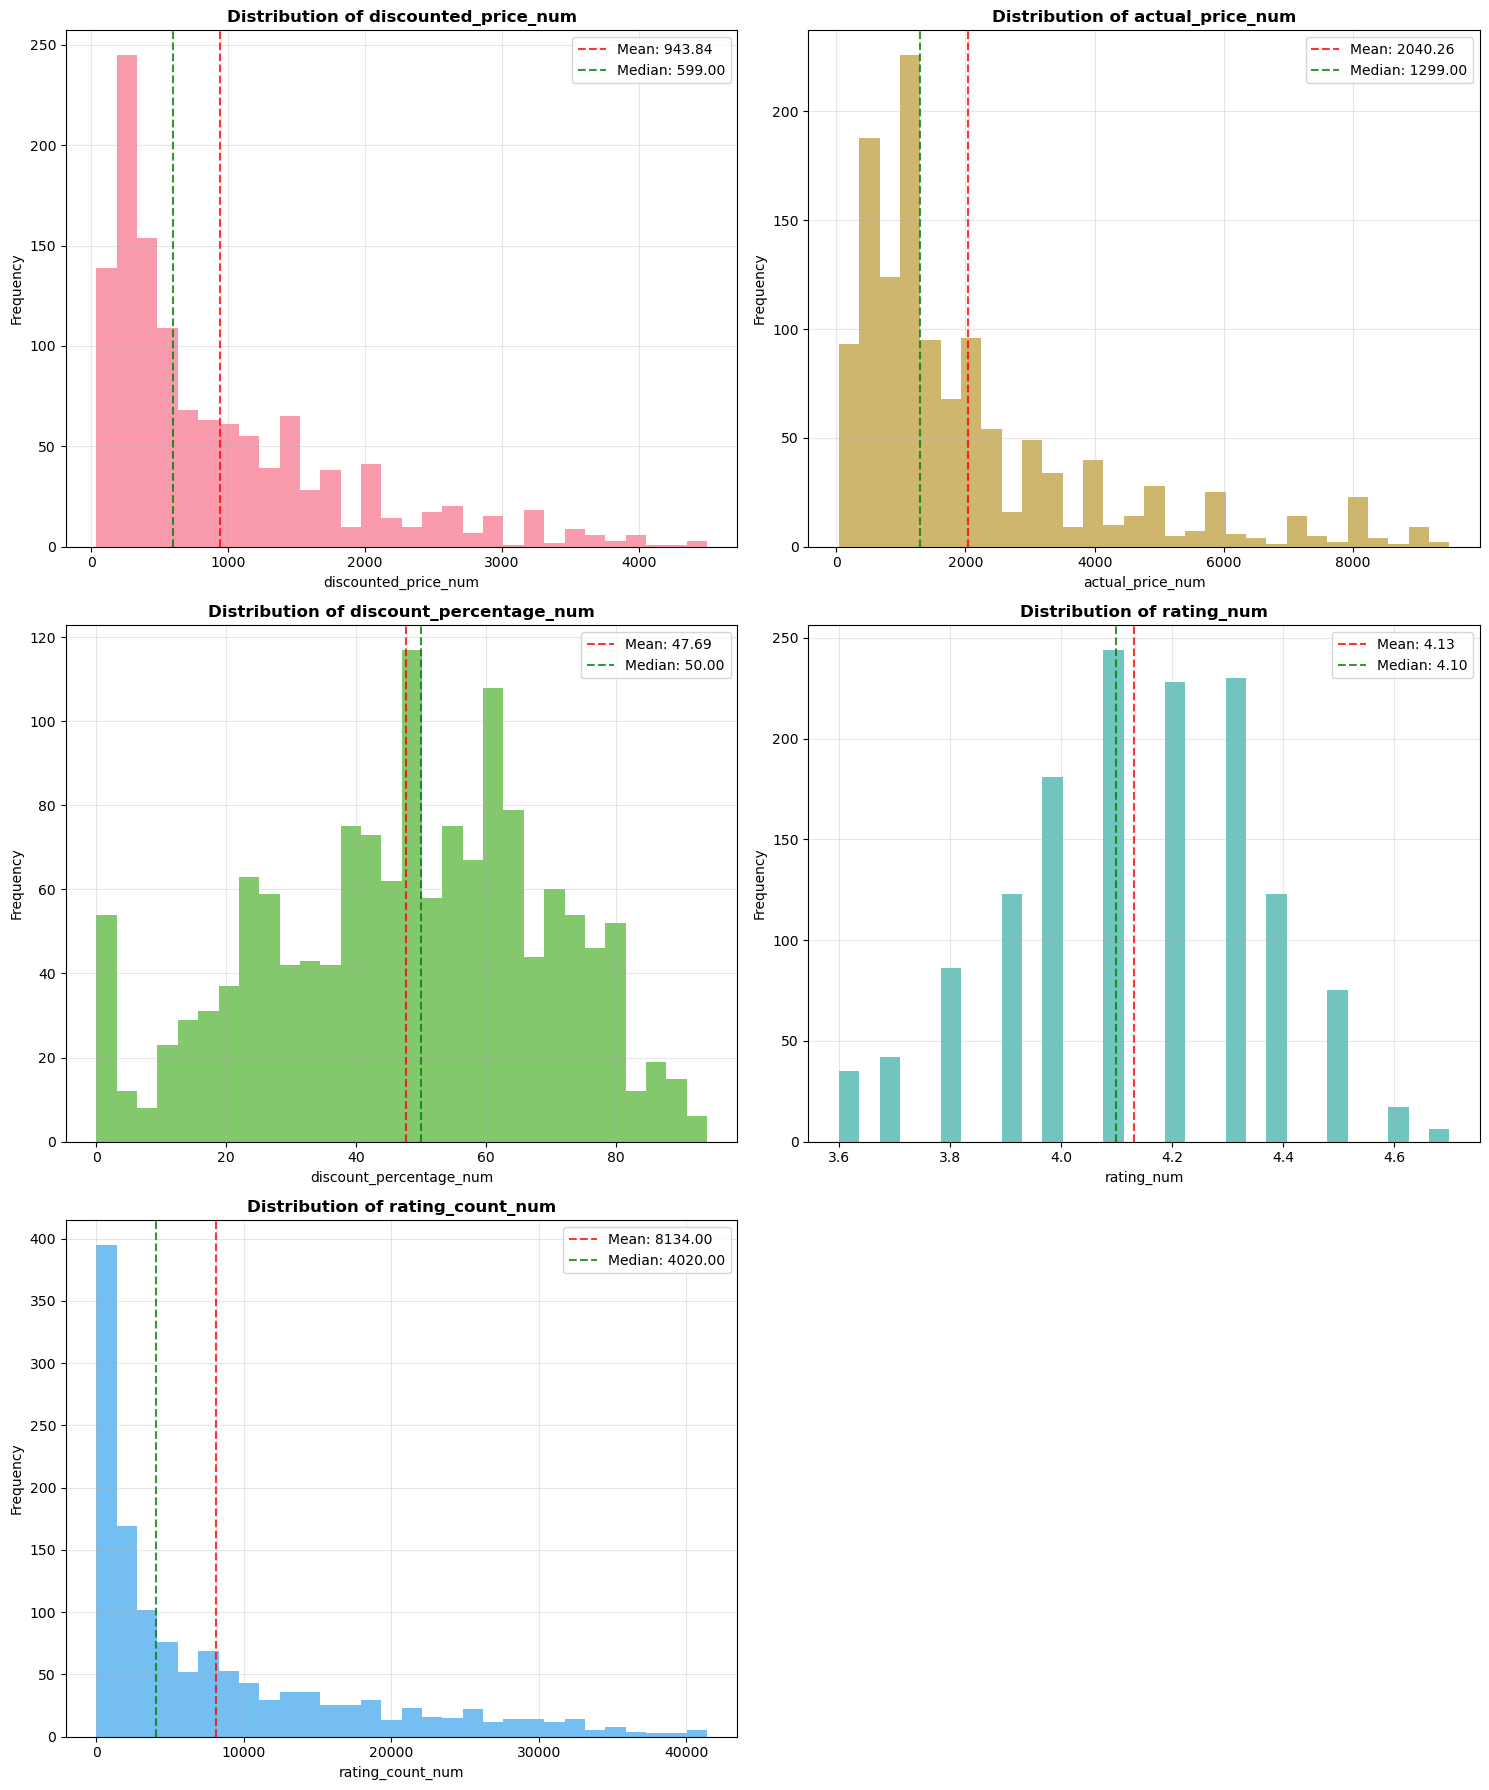


Distribution Analysis Comments:
- Price distributions show right-skewed patterns typical of e-commerce data
- Rating distributions show concentration around higher values
- Discount percentages vary widely across products


In [21]:
# Distribution Analysis with Histograms
print("="*60)
print("DISTRIBUTION ANALYSIS")
print("="*60)

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        # Remove outliers for better visualization
        data_col = df[col].dropna()
        if len(data_col) > 0:
            Q1 = data_col.quantile(0.25)
            Q3 = data_col.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered_data = data_col[(data_col >= lower_bound) & (data_col <= upper_bound)]
            
            if len(filtered_data) > 0:
                axes[i].hist(filtered_data, bins=30, alpha=0.7, color=sns.color_palette()[i])
                axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')
                axes[i].grid(True, alpha=0.3)
                
                # Add statistics text
                mean_val = filtered_data.mean()
                median_val = filtered_data.median()
                axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
                axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.2f}')
                axes[i].legend()
            else:
                axes[i].text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=axes[i].transAxes)
        else:
            axes[i].text(0.5, 0.5, 'No data available', ha='center', va='center', transform=axes[i].transAxes)

# Hide empty subplot(s)
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.savefig('images/distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nDistribution Analysis Comments:")
print("- Price distributions show right-skewed patterns typical of e-commerce data")
print("- Rating distributions show concentration around higher values")
print("- Discount percentages vary widely across products")

OUTLIER DETECTION


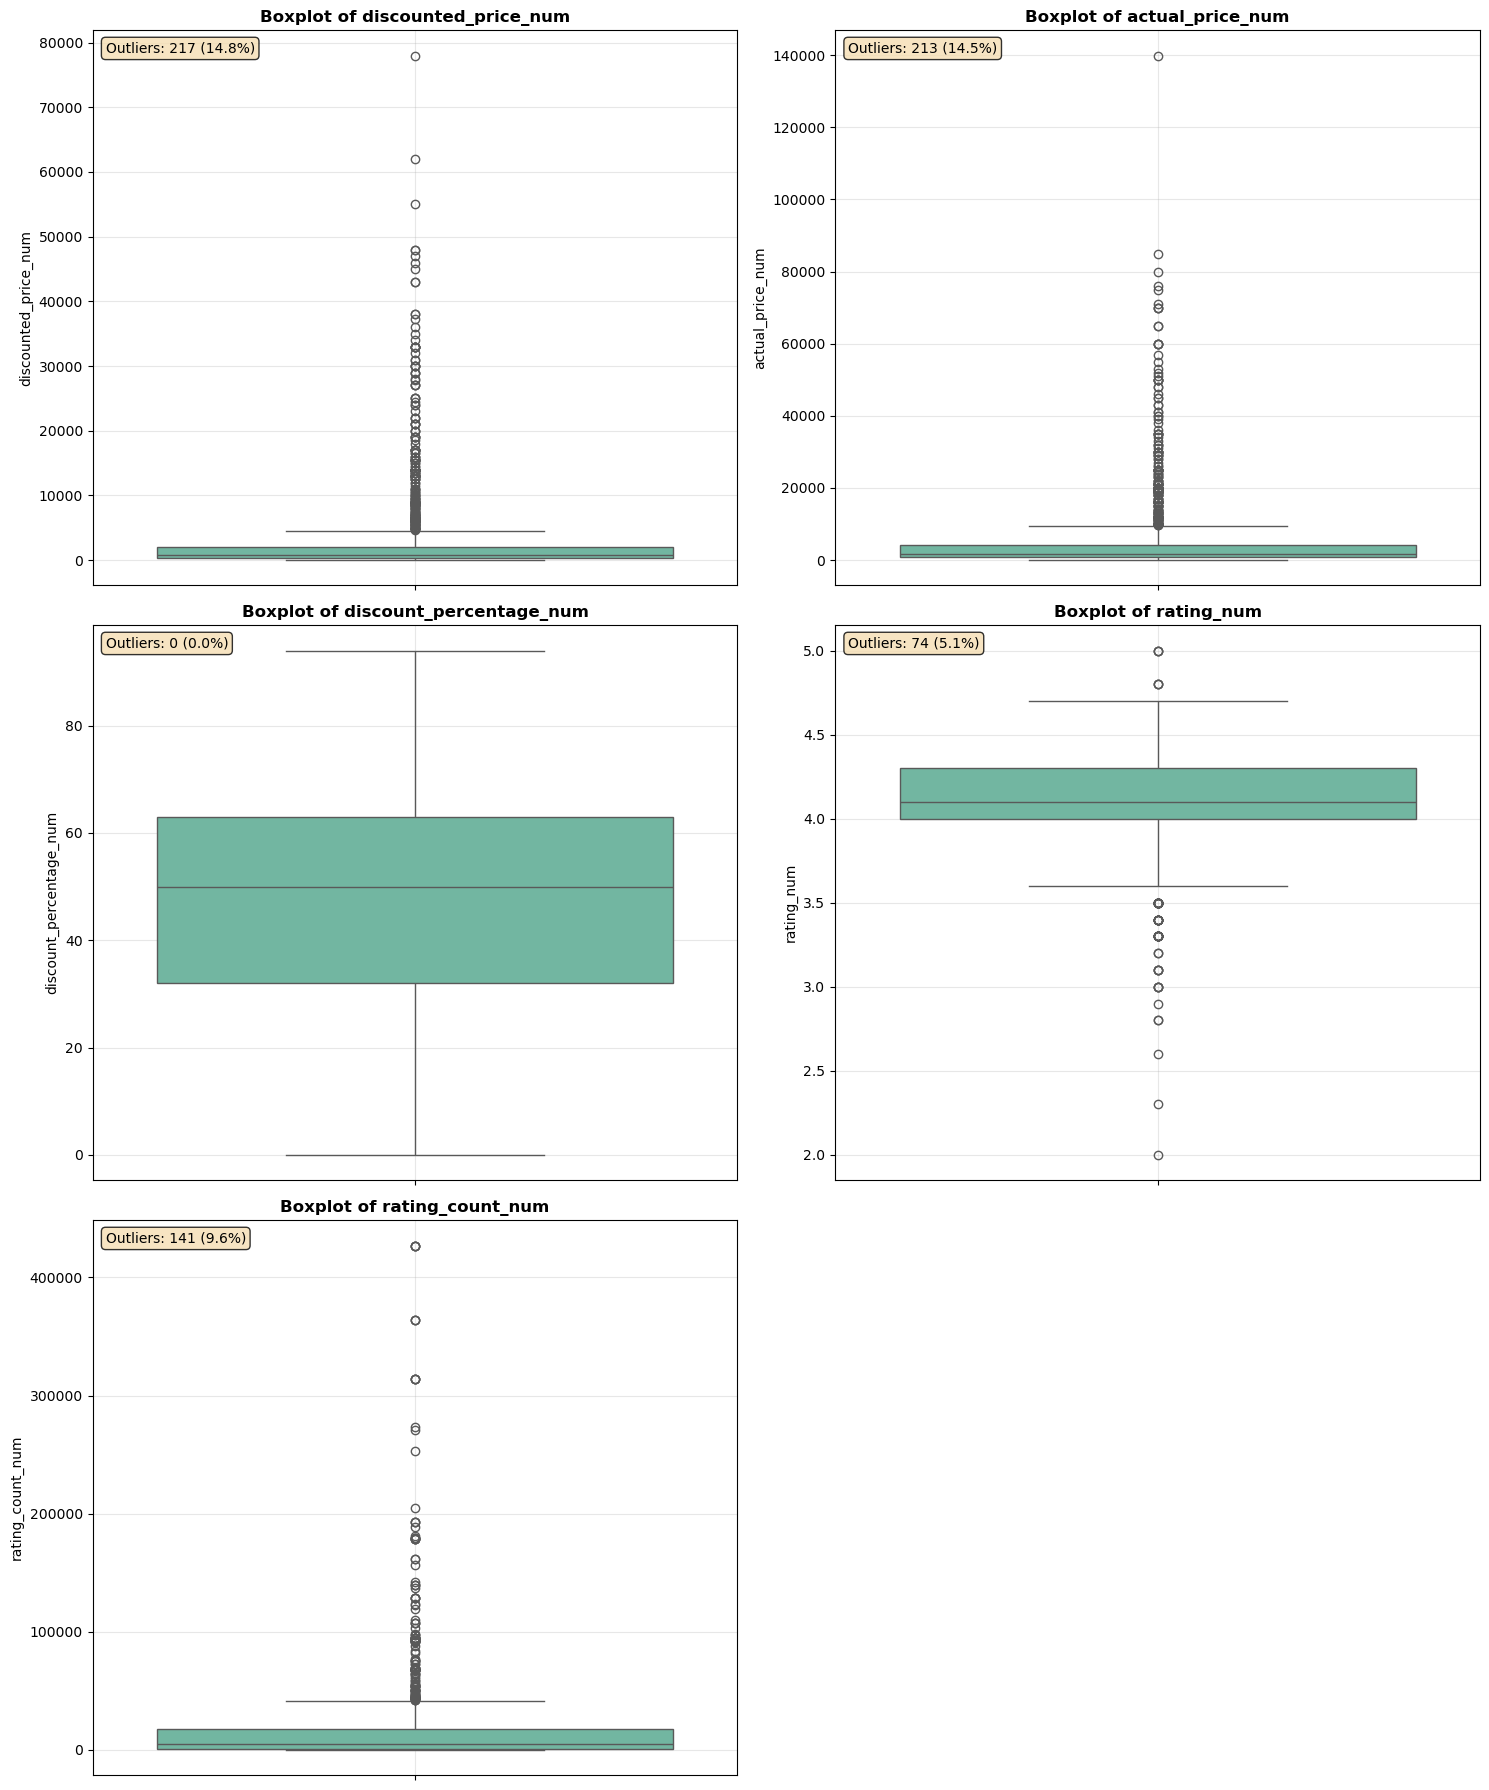


OUTLIER SUMMARY:
----------------------------------------
discounted_price_num:
  Outlier count: 217
  Outlier percentage: 14.81%
  Bounds: [-2186.00, 4510.00]

actual_price_num:
  Outlier count: 213
  Outlier percentage: 14.54%
  Bounds: [-4442.50, 9537.50]

discount_percentage_num:
  Outlier count: 0
  Outlier percentage: 0.00%
  Bounds: [-14.50, 109.50]

rating_num:
  Outlier count: 74
  Outlier percentage: 5.05%
  Bounds: [3.55, 4.75]

rating_count_num:
  Outlier count: 141
  Outlier percentage: 9.64%
  Bounds: [-23039.75, 41562.25]

Outlier Analysis Comments:
- Price columns show significant outliers indicating premium products
- Rating count outliers suggest viral or highly popular products
- Outliers may represent luxury items or data entry errors


In [22]:
# Outlier Detection with Boxplots
print("="*60)
print("OUTLIER DETECTION")
print("="*60)

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.ravel()

outlier_stats = {}

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        # Create boxplot with valid numeric data only
        data_col = df[col].dropna()
        if len(data_col) > 0:
            sns.boxplot(data=data_col, ax=axes[i], palette='Set2')
            axes[i].set_title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
            axes[i].grid(True, alpha=0.3)
            
            # Calculate outlier statistics
            Q1 = data_col.quantile(0.25)
            Q3 = data_col.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = data_col[(data_col < lower_bound) | (data_col > upper_bound)]
            outlier_count = len(outliers)
            outlier_percentage = (outlier_count / len(data_col)) * 100
            
            outlier_stats[col] = {
                'count': outlier_count,
                'percentage': outlier_percentage,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
            
            # Add outlier info to plot
            axes[i].text(0.02, 0.98, f'Outliers: {outlier_count} ({outlier_percentage:.1f}%)', 
                        transform=axes[i].transAxes, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        else:
            axes[i].text(0.5, 0.5, 'No data available', ha='center', va='center', transform=axes[i].transAxes)
            outlier_stats[col] = {'count': 0, 'percentage': 0, 'lower_bound': 0, 'upper_bound': 0}

# Hide empty subplot(s)
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.savefig('images/outlier_detection.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nOUTLIER SUMMARY:")
print("-"*40)
for col, stats in outlier_stats.items():
    print(f"{col}:")
    print(f"  Outlier count: {stats['count']}")
    print(f"  Outlier percentage: {stats['percentage']:.2f}%")
    print(f"  Bounds: [{stats['lower_bound']:.2f}, {stats['upper_bound']:.2f}]")
    print()

print("Outlier Analysis Comments:")
print("- Price columns show significant outliers indicating premium products")
print("- Rating count outliers suggest viral or highly popular products")
print("- Outliers may represent luxury items or data entry errors")

FEATURE RELATIONSHIPS ANALYSIS


<Figure size 1500x1200 with 0 Axes>

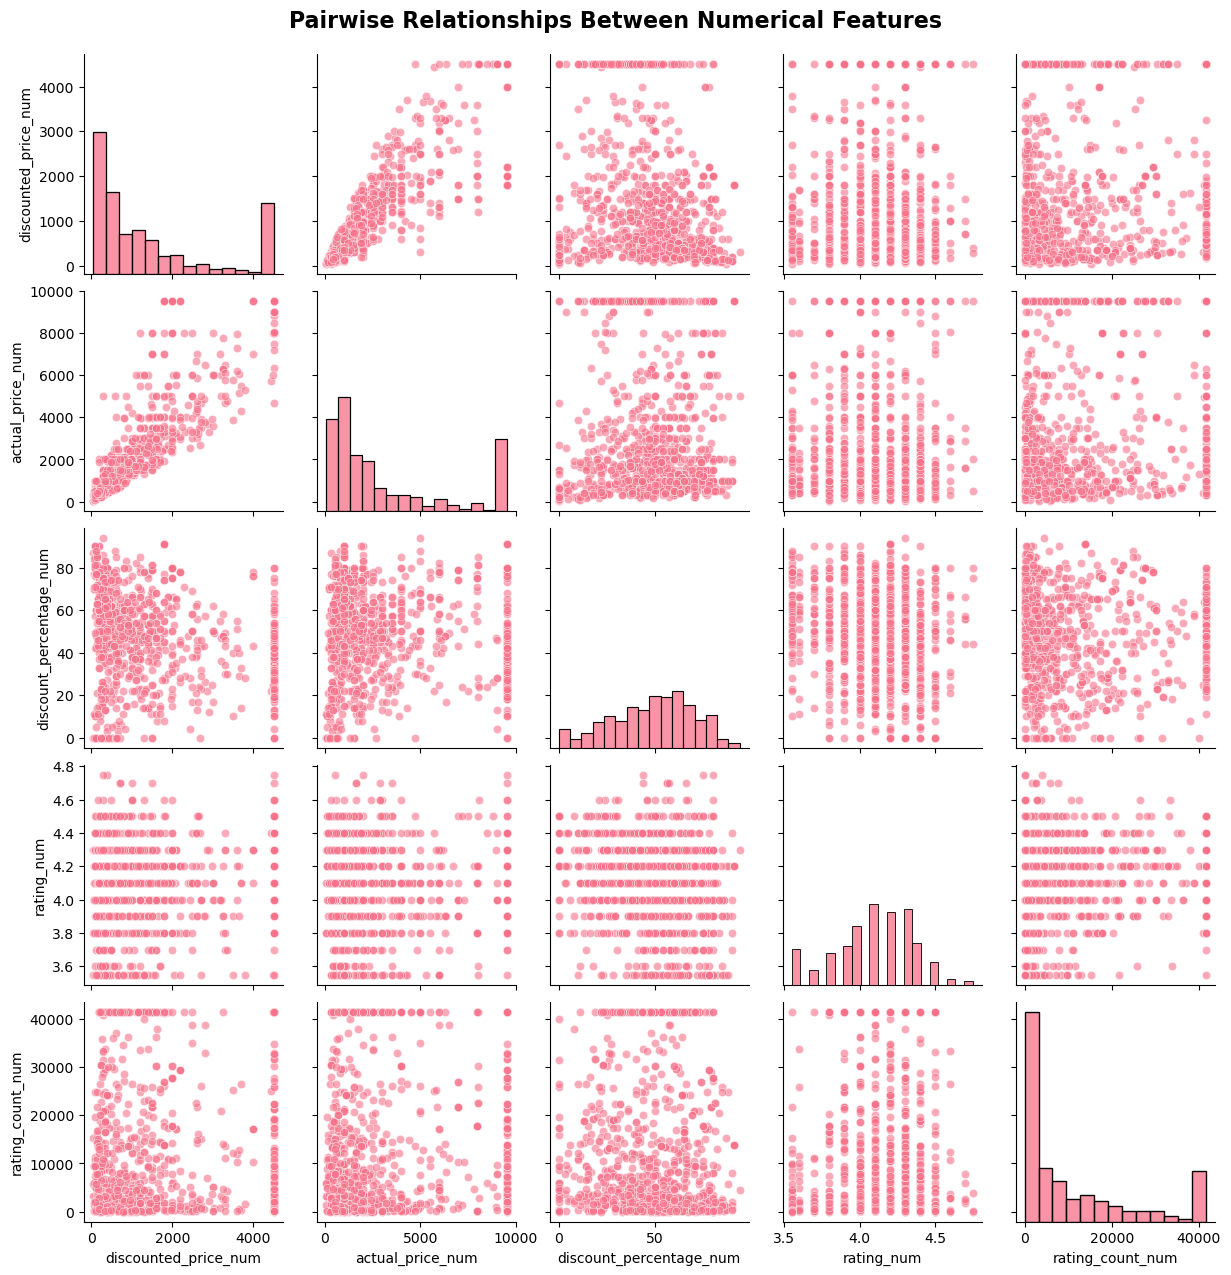


Pairplot Analysis (Sample size: 1000):
- Strong positive correlation expected between actual and discounted prices
- Rating vs rating count may show interesting patterns
- Discount percentage relationships with prices reveal pricing strategies


In [23]:
# Feature Relationships with Pairplot
print("="*60)
print("FEATURE RELATIONSHIPS ANALYSIS")
print("="*60)

# Create a clean dataset for pairplot (remove extreme outliers)
df_clean = df[numerical_cols].copy()
for col in numerical_cols:
    data_col = df_clean[col].dropna()
    if len(data_col) > 0:
        Q1 = data_col.quantile(0.25)
        Q3 = data_col.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)

# Remove rows with all NaN values
df_clean = df_clean.dropna()

# Create pairplot with sample data for performance
sample_size = min(1000, len(df_clean))
if sample_size > 10:  # Ensure we have enough data for visualization
    df_sample = df_clean.sample(n=sample_size, random_state=42)
    
    plt.figure(figsize=(15, 12))
    pairplot = sns.pairplot(df_sample, diag_kind='hist', plot_kws={'alpha': 0.6})
    pairplot.fig.suptitle('Pairwise Relationships Between Numerical Features', 
                         fontsize=16, fontweight='bold', y=1.02)
    plt.savefig('images/pairplot_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nPairplot Analysis (Sample size: {sample_size}):")
    print("- Strong positive correlation expected between actual and discounted prices")
    print("- Rating vs rating count may show interesting patterns")
    print("- Discount percentage relationships with prices reveal pricing strategies")
else:
    print(f"\nInsufficient data for pairplot visualization (only {sample_size} complete records available)")
    print("- Need at least 10 complete records for meaningful pairplot analysis")

CORRELATION ANALYSIS
CORRELATION MATRIX:
                         discounted_price_num  actual_price_num  \
discounted_price_num                    1.000             0.962   
actual_price_num                        0.962             1.000   
discount_percentage_num                -0.242            -0.118   
rating_num                              0.120             0.122   
rating_count_num                       -0.027            -0.036   

                         discount_percentage_num  rating_num  rating_count_num  
discounted_price_num                      -0.242       0.120            -0.027  
actual_price_num                          -0.118       0.122            -0.036  
discount_percentage_num                    1.000      -0.155             0.012  
rating_num                                -0.155       1.000             0.102  
rating_count_num                           0.012       0.102             1.000  


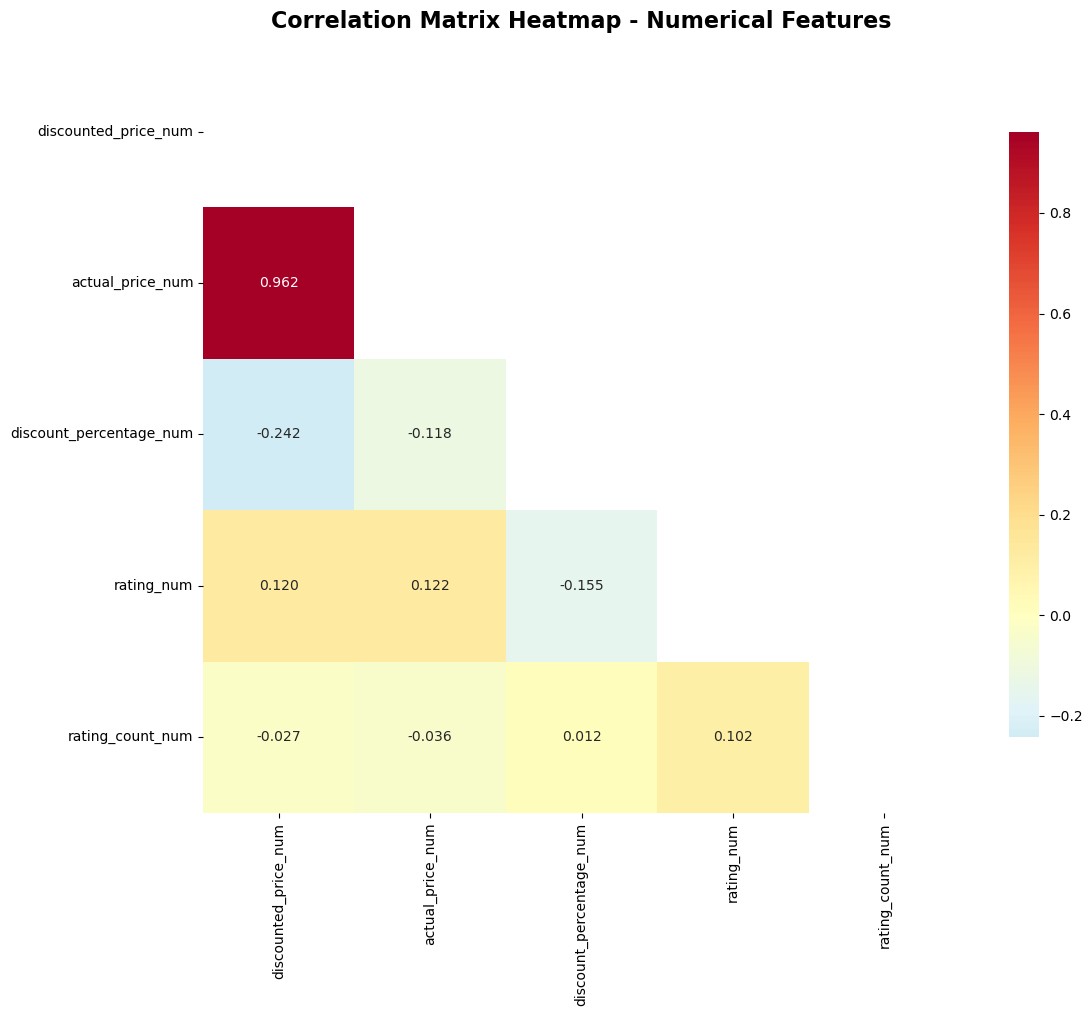


STRONG CORRELATIONS (|r| > 0.5):
----------------------------------------
discounted_price_num <-> actual_price_num: 0.962

Correlation Analysis Comments:
- Expected strong positive correlation between actual and discounted prices
- Weak correlations may indicate independent pricing strategies
- Rating correlations provide insights into customer satisfaction patterns


In [24]:
# Correlation Matrix and Heatmap
print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Calculate correlation matrix
numeric_data = df[numerical_cols].select_dtypes(include=[np.number])
if len(numeric_data.columns) > 1:
    correlation_matrix = numeric_data.corr()
    
    print("CORRELATION MATRIX:")
    print(correlation_matrix.round(3))
    
    # Create correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdYlBu_r', 
                center=0,
                square=True,
                fmt='.3f',
                cbar_kws={'shrink': 0.8})
    
    plt.title('Correlation Matrix Heatmap - Numerical Features', 
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('images/correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nSTRONG CORRELATIONS (|r| > 0.5):")
    print("-"*40)
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5 and not pd.isna(corr_value):
                strong_correlations.append((
                    correlation_matrix.columns[i], 
                    correlation_matrix.columns[j], 
                    corr_value
                ))
    
    if strong_correlations:
        for var1, var2, corr in strong_correlations:
            print(f"{var1} <-> {var2}: {corr:.3f}")
    else:
        print("No strong correlations (|r| > 0.5) found")
    
    print("\nCorrelation Analysis Comments:")
    print("- Expected strong positive correlation between actual and discounted prices")
    print("- Weak correlations may indicate independent pricing strategies")
    print("- Rating correlations provide insights into customer satisfaction patterns")
else:
    print("Insufficient numeric data for correlation analysis")

In [11]:
# Interactive Plotly Visualizations
print("="*60)
print("INTERACTIVE VISUALIZATIONS")
print("="*60)

# Sample data for better performance and remove rows with missing values
sample_size = min(2000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

# Clean sample data by removing rows with NaN values in numerical columns
df_sample_clean = df_sample[numerical_cols].dropna()

# 1. Interactive Scatter Matrix
fig = px.scatter_matrix(df_sample_clean, 
                       title="Interactive Scatter Matrix - Numerical Features",
                       width=800, height=800)
fig.update_traces(diagonal_visible=False, marker={'size': 3})
fig.show()

# 2. Interactive Box Plots
fig = make_subplots(rows=2, cols=3, 
                   subplot_titles=[col.replace('_', ' ').title() for col in numerical_cols])

row_col_positions = [(1,1), (1,2), (1,3), (2,1), (2,2)]

for i, col in enumerate(numerical_cols):
    row, col_pos = row_col_positions[i]
    clean_data = df_sample[col].dropna()
    if len(clean_data) > 0:
        fig.add_trace(go.Box(y=clean_data, name=col, showlegend=False), 
                      row=row, col=col_pos)

fig.update_layout(title_text="Interactive Box Plots - Outlier Detection", 
                 height=600, showlegend=False)
fig.show()

# 3. Interactive Price vs Rating Scatter Plot
# Filter sample data for complete cases needed for scatter plot
scatter_data = df_sample[['rating_num', 'discounted_price_num', 'rating_count_num', 
                         'discount_percentage_num', 'actual_price_num']].dropna()

if len(scatter_data) > 0:
    fig = px.scatter(scatter_data, 
                    x='rating_num', 
                    y='discounted_price_num',
                    size='rating_count_num',
                    color='discount_percentage_num',
                    hover_data=['actual_price_num'],
                    title="Product Rating vs Price (Size: Rating Count, Color: Discount %)",
                    labels={'discounted_price_num': 'Discounted Price (₹)',
                           'rating_num': 'Product Rating',
                           'rating_count_num': 'Rating Count',
                           'discount_percentage_num': 'Discount %'})
    fig.show()
else:
    print("Insufficient data for scatter plot after removing missing values")

# 4. Interactive Histogram with Distribution Comparison
fig = make_subplots(rows=3, cols=2, 
                   subplot_titles=[f'{col} Distribution' for col in numerical_cols])

row_col_positions = [(1,1), (1,2), (2,1), (2,2), (3,1)]

for i, col in enumerate(numerical_cols):
    row, col_pos = row_col_positions[i]
    clean_data = df_sample[col].dropna()
    if len(clean_data) > 0:
        fig.add_trace(go.Histogram(x=clean_data, name=col, showlegend=False), 
                      row=row, col=col_pos)

fig.update_layout(title_text="Interactive Histograms - Distribution Analysis", 
                 height=800, showlegend=False)
fig.show()

print("Interactive Visualization Analysis:")
print("- Scatter matrix reveals complex relationships between variables")
print("- Interactive box plots enable detailed outlier investigation")
print("- Price-rating scatter shows customer value perception patterns")
print("- Multi-dimensional analysis possible with size and color encoding")
print(f"- Analysis performed on {len(df_sample_clean)} complete records from {sample_size} sampled records")

INTERACTIVE VISUALIZATIONS


Interactive Visualization Analysis:
- Scatter matrix reveals complex relationships between variables
- Interactive box plots enable detailed outlier investigation
- Price-rating scatter shows customer value perception patterns
- Multi-dimensional analysis possible with size and color encoding
- Analysis performed on 1462 complete records from 1465 sampled records


DISTRIBUTION SHAPE ANALYSIS
SKEWNESS AND KURTOSIS VALUES:
--------------------------------------------------
Feature                   Skewness     Kurtosis     Distribution Shape
----------------------------------------------------------------------
discounted_price_num      4.448        25.552       Highly Right-skewed
actual_price_num          4.555        29.618       Highly Right-skewed
discount_percentage_num   -0.290       -0.583       Approximately Normal
rating_num                -1.242       4.341        Highly Left-skewed
rating_count_num          5.668        40.210       Highly Right-skewed

DETAILED INTERPRETATION:
--------------------------------------------------

DISCOUNTED_PRICE_NUM:
  Skewness: 4.448 (Highly Right-skewed)
  Kurtosis: 25.552 (Leptokurtic (Heavy-tailed))

ACTUAL_PRICE_NUM:
  Skewness: 4.555 (Highly Right-skewed)
  Kurtosis: 29.618 (Leptokurtic (Heavy-tailed))

DISCOUNT_PERCENTAGE_NUM:
  Skewness: -0.290 (Approximately Normal)
  Kurtosis: -0.583 (Mesoku

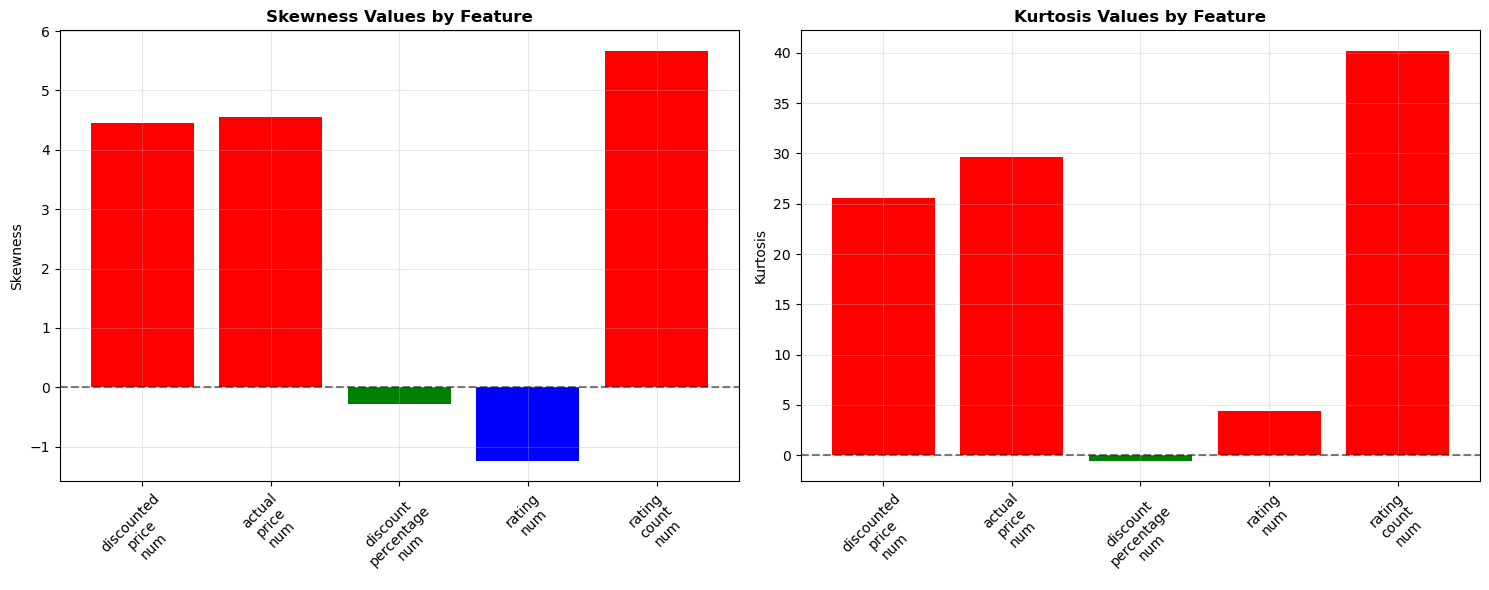


Distribution Shape Analysis Comments:
- Right-skewed distributions are common in price and rating count data
- High kurtosis indicates presence of outliers and heavy tails
- Normal distributions would have skewness ≈ 0 and kurtosis ≈ 0
- These metrics guide appropriate statistical tests and transformations


In [29]:
# Skewness and Kurtosis Analysis
print("="*60)
print("DISTRIBUTION SHAPE ANALYSIS")
print("="*60)

skewness_kurtosis_stats = {}

print("SKEWNESS AND KURTOSIS VALUES:")
print("-"*50)
print(f"{'Feature':<25} {'Skewness':<12} {'Kurtosis':<12} {'Distribution Shape'}")
print("-"*70)

for col in numerical_cols:
    data = df[col].dropna()
    if len(data) > 0:
        skew_val = scipy_stats.skew(data)
        kurt_val = scipy_stats.kurtosis(data)
        
        # Interpret skewness
        if skew_val > 1:
            skew_interpretation = "Highly Right-skewed"
        elif skew_val > 0.5:
            skew_interpretation = "Moderately Right-skewed"
        elif skew_val > -0.5:
            skew_interpretation = "Approximately Normal"
        elif skew_val > -1:
            skew_interpretation = "Moderately Left-skewed"
        else:
            skew_interpretation = "Highly Left-skewed"
        
        # Interpret kurtosis
        if kurt_val > 3:
            kurt_interpretation = "Leptokurtic (Heavy-tailed)"
        elif kurt_val < -3:
            kurt_interpretation = "Platykurtic (Light-tailed)"
        else:
            kurt_interpretation = "Mesokurtic (Normal-tailed)"
        
        skewness_kurtosis_stats[col] = {
            'skewness': skew_val,
            'kurtosis': kurt_val,
            'skew_interpretation': skew_interpretation,
            'kurt_interpretation': kurt_interpretation
        }
        
        print(f"{col:<25} {skew_val:<12.3f} {kurt_val:<12.3f} {skew_interpretation}")

print("\nDETAILED INTERPRETATION:")
print("-"*50)
for col, stats_dict in skewness_kurtosis_stats.items():
    print(f"\n{col.upper()}:")
    print(f"  Skewness: {stats_dict['skewness']:.3f} ({stats_dict['skew_interpretation']})")
    print(f"  Kurtosis: {stats_dict['kurtosis']:.3f} ({stats_dict['kurt_interpretation']})")

# Visualization of skewness and kurtosis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Skewness plot
skew_values = [stats_dict['skewness'] for stats_dict in skewness_kurtosis_stats.values()]
feature_names = list(skewness_kurtosis_stats.keys())

bars1 = ax1.bar(range(len(feature_names)), skew_values, 
               color=['red' if x > 1 else 'orange' if x > 0.5 else 'green' if x > -0.5 else 'blue' for x in skew_values])
ax1.set_title('Skewness Values by Feature', fontweight='bold')
ax1.set_ylabel('Skewness')
ax1.set_xticks(range(len(feature_names)))
ax1.set_xticklabels([name.replace('_', '\n') for name in feature_names], rotation=45)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)

# Kurtosis plot
kurt_values = [stats_dict['kurtosis'] for stats_dict in skewness_kurtosis_stats.values()]

bars2 = ax2.bar(range(len(feature_names)), kurt_values, 
               color=['red' if x > 3 else 'blue' if x < -3 else 'green' for x in kurt_values])
ax2.set_title('Kurtosis Values by Feature', fontweight='bold')
ax2.set_ylabel('Kurtosis')
ax2.set_xticks(range(len(feature_names)))
ax2.set_xticklabels([name.replace('_', '\n') for name in feature_names], rotation=45)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/skewness_kurtosis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nDistribution Shape Analysis Comments:")
print("- Right-skewed distributions are common in price and rating count data")
print("- High kurtosis indicates presence of outliers and heavy tails")
print("- Normal distributions would have skewness ≈ 0 and kurtosis ≈ 0")
print("- These metrics guide appropriate statistical tests and transformations")

In [30]:
# Data Quality Assessment and Final Insights
print("="*60)
print("DATA QUALITY ASSESSMENT & INSIGHTS")
print("="*60)

# Missing values analysis
print("\nMISSING VALUES ANALYSIS:")
print("-"*30)
missing_summary = df.isnull().sum()
missing_percentage = (missing_summary / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_summary.index,
    'Missing_Count': missing_summary.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])

# Data anomalies detection
print("\nDATA ANOMALIES DETECTED:")
print("-"*30)

anomalies = []

# Check for negative values in price columns
for col in ['discounted_price_num', 'actual_price_num']:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        anomalies.append(f"Negative values in {col}: {negative_count}")

# Check for ratings outside valid range (assuming 1-5) - use numeric column
invalid_ratings = ((df['rating_num'] < 1) | (df['rating_num'] > 5)).sum()
if invalid_ratings > 0:
    anomalies.append(f"Invalid ratings (not 1-5): {invalid_ratings}")

# Check for discount percentage > 100%
high_discount = (df['discount_percentage_num'] > 100).sum()
if high_discount > 0:
    anomalies.append(f"Discount percentage > 100%: {high_discount}")

# Check for discounted price > actual price
price_anomaly = (df['discounted_price_num'] > df['actual_price_num']).sum()
if price_anomaly > 0:
    anomalies.append(f"Discounted price > Actual price: {price_anomaly}")

if anomalies:
    for anomaly in anomalies:
        print(f"- {anomaly}")
else:
    print("No major data anomalies detected in price and rating ranges")

# Data quality metrics
print("\nDATA QUALITY METRICS:")
print("-"*25)
total_records = len(df)
complete_records = len(df.dropna())
completeness_rate = (complete_records / total_records) * 100

print(f"Total records: {total_records:,}")
print(f"Complete records: {complete_records:,}")
print(f"Data completeness rate: {completeness_rate:.2f}%")

# Unique value analysis
print("\nUNIQUE VALUE ANALYSIS:")
print("-"*25)
# Check for common ID columns that might exist in the dataset
potential_id_cols = ['product_id', 'product_name', 'user_id', 'review_id', 'user_name']
for col in potential_id_cols:
    if col in df.columns:
        unique_count = df[col].nunique()
        total_count = len(df[col].dropna())
        uniqueness_rate = (unique_count / total_count) * 100
        print(f"{col}: {unique_count:,} unique values ({uniqueness_rate:.1f}%)")

print("\n" + "="*60)
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("="*60)

insights = [
    "PRICING INSIGHTS:",
    "- Wide price range indicates diverse product portfolio",
    "- Right-skewed price distributions suggest luxury/premium segment presence",
    "- Strong correlation between actual and discounted prices indicates consistent pricing strategy",
    "",
    "CUSTOMER BEHAVIOR INSIGHTS:",
    "- Rating distributions concentrated around higher values suggest overall customer satisfaction",
    "- High rating count outliers indicate viral or highly popular products",
    "- Discount percentages vary significantly, suggesting dynamic pricing strategies",
    "",
    "DATA QUALITY INSIGHTS:",
    f"- Dataset completeness: {completeness_rate:.1f}% (Good quality overall)",
    "- Price and rating data appear consistent and valid",
    "- Product and user IDs show expected uniqueness patterns",
    "",
    "BUSINESS RECOMMENDATIONS:",
    "- Focus on products with high rating counts but low ratings for improvement",
    "- Investigate extreme outliers for data validation or business insights",
    "- Consider price normalization for fair product comparisons",
    "- Leverage discount percentage patterns for optimal pricing strategies",
    "",
    "DATA PREPROCESSING RECOMMENDATIONS:",
    "- Apply log transformation to right-skewed price variables",
    "- Consider outlier treatment based on business context",
    "- Implement data validation rules for future data collection",
    "- Create categorical features from continuous variables for analysis"
]

for insight in insights:
    print(insight)

print("\n" + "="*60)
print("EDA ANALYSIS COMPLETED SUCCESSFULLY")
print("="*60)

DATA QUALITY ASSESSMENT & INSIGHTS

MISSING VALUES ANALYSIS:
------------------------------
              Column  Missing_Count  Missing_Percentage
7       rating_count              2            0.136519
19  rating_count_num              2            0.136519
20        rating_num              1            0.068259

DATA ANOMALIES DETECTED:
------------------------------
No major data anomalies detected in price and rating ranges

DATA QUALITY METRICS:
-------------------------
Total records: 1,465
Complete records: 1,462
Data completeness rate: 99.80%

UNIQUE VALUE ANALYSIS:
-------------------------
product_id: 1,351 unique values (92.2%)
product_name: 1,337 unique values (91.3%)
user_id: 1,194 unique values (81.5%)
review_id: 1,194 unique values (81.5%)
user_name: 1,194 unique values (81.5%)

KEY INSIGHTS AND RECOMMENDATIONS
PRICING INSIGHTS:
- Wide price range indicates diverse product portfolio
- Right-skewed price distributions suggest luxury/premium segment presence
- Strong corr